In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw07.ok')

Assignment: Homework 7: Testing Hypotheses
OK, version v1.18.1



# Homework 7: Testing Hypotheses

**Helpful Resource:**
- [Python Reference](http://data8.org/sp21/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Reading**: 
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Make sure to explain your answer for written questions.** **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is due Thursday, March 11 at 11:59 P.M. PST. You will receive an early submission bonus point if you turn in your final submission by Wednesday, March 10 at 11:59 P.M. PST. Late work will not be accepted as per the [policies](http://data8.org/sp21/policies.html) page.

**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday-Friday. The schedule appears on [http://data8.org/sp21/office-hours.html](http://data8.org/sp21/office-hours.html).

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import *
def new_save_notebook(self):
    """ Saves the current notebook by
        injecting JavaScript to save to .ipynb file.
    """
    try:
        from IPython.display import display, Javascript
    except ImportError:
        log.warning("Could not import IPython Display Function")
        print("Make sure to save your notebook before sending it to OK!")
        return

    if self.mode == "jupyter":
        display(Javascript('IPython.notebook.save_checkpoint();'))
        display(Javascript('IPython.notebook.save_notebook();'))
    elif self.mode == "jupyterlab":
        display(Javascript('document.querySelector(\'[data-command="docmanager:save"]\').click();'))   

    print('Saving notebook...', end=' ')

    ipynbs = [path for path in self.assignment.src
              if os.path.splitext(path)[1] == '.ipynb']
    # Wait for first .ipynb to save
    if ipynbs:
        if wait_for_save(ipynbs[0]):
            print("Saved '{}'.".format(ipynbs[0]))
        else:
            log.warning("Timed out waiting for IPython save")
            print("Could not automatically save \'{}\'".format(ipynbs[0]))
            print("Make sure your notebook"
                  " is correctly named and saved before submitting to OK!".format(ipynbs[0]))
            return False                
    else:
        print("No valid file sources found")
    return True

def wait_for_save(filename, timeout=600):
    """Waits for FILENAME to update, waiting up to TIMEOUT seconds.
    Returns True if a save was detected, and False otherwise.
    """
    modification_time = os.path.getmtime(filename)
    start_time = time.time()
    while time.time() < start_time + timeout:
        if (os.path.getmtime(filename) > modification_time and
            os.path.getsize(filename) > 0):
            return True
        time.sleep(0.2)
    return False

Notebook.save_notebook = new_save_notebook

ok = Notebook('hw07.ok')
_ = ok.auth(inline=True)

Assignment: Homework 7: Testing Hypotheses
OK, version v1.18.1

Successfully logged in as caediseim@berkeley.edu


Before continuing the assignment, select "Save and Checkpoint" in the File menu and then execute the submit cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to okpy.org and flag the correct version. There will be another submit cell at the end of the assignment when you finish!

In [3]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Submit... 100% complete
Assignment is due in 5 hours, 1 minute, and 29 seconds
Submission successful for user: caediseim@berkeley.edu
URL: https://okpy.org/cal/data8/sp21/hw07/submissions/7XK8qG



## 1. Spam Calls


## Part 1: 781 Fun

Yanay gets a lot of spam calls. An area code is defined to be a three digit number from 200-999 inclusive. In reality, many of these area codes are not in use, but for this question we'll simplify things and assume they all are. **Throughout these questions, you should assume that Yanay's area code is 781.**

Yanay suspects that there's a higher chance that the spammers are using his area code (781) to trick him into thinking it's someone from his area calling him. Ashley thinks that this is not the case, and that spammers are just choosing area codes of the spam calls at random from all possible area codes (*Remember, for this question we’re assuming the possible area codes are 200-999, inclusive*). Yanay wants to test his claim using the 50 spam calls he received in the past month.

Here's a dataset of the area codes of the 50 spam calls he received in the past month.

In [4]:
# Just run this cell
spam = Table().read_table('spam.csv')
spam

Area Code
891
924
516
512
328
613
214
781
591
950


Our **null hypothesis** is that area codes for Yanay’s spam calls are chosen at random, and each area code (200-999) is equally likely to be chosen. Our **alternative hypothesis** is that there's a higher chance of getting a spam call with an area code of 781.

<div class="hide">\pagebreak</div>

**Suppose you decide to use the number of times you see the area code 781 in 50 spam calls as your test statistic.**

**Question 1.** 
Write a function called `simulate` that generates exactly one simulated value of your test statistic under the null hypothesis.  It should take no arguments and simulate 50 area codes under the assumption that the result of each area is sampled from the range 200-999 inclusive with equal probability. Your function should return the number of times you saw the 781 area code in those 50 random spam calls.


<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [5]:
possible_area_codes = np.arange(200, 1000)
def simulate():
    return np.count_nonzero(np.random.choice(possible_area_codes, 50) == 781)
# Call your function to make sure it works
simulate()

0

In [6]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Generate 20,000 simulated values of the number of times you see the area code 781 in 50 random spam calls. Assign `test_statistics_under_null` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 1.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [27]:
test_statistics_under_null = make_array()
repetitions = 20000

for i in np.arange(repetitions):
    test_statistics_under_null = np.append(test_statistics_under_null, simulate())
    
test_statistics_under_null

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
ok.grade("q1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Using the results from Question 2, generate a histogram of the empirical distribution of the number of times you saw the area code 781 in your simulation. **NOTE: Use the provided bins when making the histogram.**

*Hint:* Remember we can only generate histograms from a particular data type.


<!--
BEGIN QUESTION
name: q1_3
manual: true
-->
<!-- EXPORT TO PDF -->

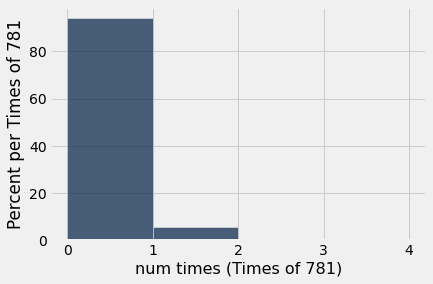

In [29]:
bins = np.arange(0,5,1) # Use these provided bins
Table().with_columns('num times', test_statistics_under_null).hist('num times', unit='Times of 781', bins = np.arange(0,5,1))

<div class="hide">\pagebreak</div>

**Question 4.** Compute an empirical P-value for this test.

*Hint*: For a refresher on computing P-value, check out this [textbook section](https://www.inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#Conventional-Cut-offs-and-the-P-value).

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [30]:
# First calculate the observed value of the test statistic from the `spam` table.
observed_val = spam.where('Area Code', are.equal_to(781)).num_rows
p_value = np.count_nonzero(np.mean(test_statistics_under_null) >= observed_val)/20000 
p_value


0.0

In [23]:
ok.grade("q1_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Suppose you use a P-value cutoff of 1%. What do you conclude from the hypothesis test? Why?

<!--
BEGIN QUESTION
name: q1_5
manual: true
-->
<!-- EXPORT TO PDF -->

The p value is smaller than the 1% so we can conclude that the results are highly statistically significant and that the data supports alternative hypothesis because the chance that the test statistic was greater than or equal to the observed value happened given the null hypothesis is true is less than 1%. 

## Part 2: Multiple Spammers

Instead of checking if the area code is equal to his own, Yanay decides to check if the area code matches the area code of one of the 8 places he's been to recently, and wants to test if it's more likely to receive a spam call with an area code from any of those 8 places. These are the area codes of the places he's been to recently: 781, 617, 509, 510, 212, 858, 339, 626.

**Question 6.** Define the null hypothesis and alternative hypothesis for this investigation.

*Reminder: Don’t forget that your null hypothesis should fully describe a probability model that we can use for simulation later.*


<!--
BEGIN QUESTION
name: q1_6
manual: true
-->
<!-- EXPORT TO PDF -->

The null hypothesis is that each area code has an equal percent chance of being called and any deviation is due to chance.
The alternate hypothesis is that the eight area codes of places that Yanay has been to have a greater chance of being called.

<div class="hide">\pagebreak</div>

**Suppose you decide to use the number of times you see any of the area codes of the places Yanay has been to in 50 spam calls as your test statistic.**

**Question 7.** 
Write a function called `simulate_visited_area_codes` that generates exactly one simulated value of your test statistic under the null hypothesis.  It should take no arguments and simulate 50 area codes under the assumption that the result of each area is sampled from the range 200-999 inclusive with equal probability. Your function should return the number of times you saw any of the area codes of the places Yanay has been to in those 50 spam calls.

*Hint*: You may find the textbook [section](https://www.inferentialthinking.com/chapters/11/1/Assessing_Models#Predicting-the-Statistic-Under-the-Model) on the `sample_proportions` function to be useful. For `model_proportions`, under the null hypothesis, what's the chance of drawing one of the area codes Yanay has recently been to? What's the chance you don't draw one of those?

<!--
BEGIN QUESTION
name: q1_7
manual: false
-->

In [39]:
model_proportions = make_array(8/799, 791/799)
def simulate_visited_area_codes():
    return sample_proportions(50, model_proportions).item(0) * 100
    
# Call your function to make sure it works
simulate_visited_area_codes()

2.0

In [40]:
ok.grade("q1_7");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



**Question 8.** Generate 20,000 simulated values of the number of times you see any of the area codes of the places Yanay has been to in 50 random spam calls. Assign `visited_test_statistics_under_null` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 7.

<!--
BEGIN QUESTION
name: q1_8
manual: false
-->

In [44]:
visited_test_statistics_under_null = make_array()

repetitions = 20000
for i in np.arange(repetitions):
    visited_test_statistics_under_null = np.append(visited_test_statistics_under_null, simulate_visited_area_codes())

visited_test_statistics_under_null

array([0., 0., 0., ..., 2., 0., 6.])

In [45]:
ok.grade("q1_8");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 9.** Using the results from Question 8, generate a histogram of the empirical distribution of the number of times you saw any of the area codes of the places Yanay has been to in your simulation. **NOTE: Use the provided bins when making the histogram.**

<!--
BEGIN QUESTION
name: q1_9
manual: true
-->
<!-- EXPORT TO PDF -->

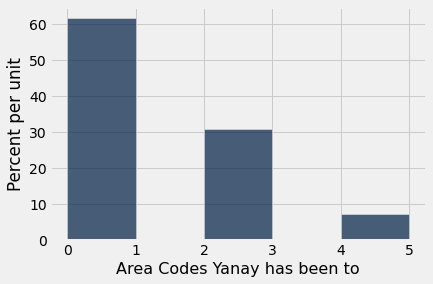

In [49]:
bins_visited = np.arange(0,6,1) # Use these provided bins
Table().with_columns('Area Codes Yanay has been to', visited_test_statistics_under_null).hist('Area Codes Yanay has been to', bins= np.arange(0,6,1))

**Question 10.** Suppose you run this test for 4000 different people after observing each person's last 50 spam calls. When you reject the null hypothesis for a person, you accuse the spam callers of favoring the area codes that person has visited. If the spam callers were not actually favoring area codes that people have visited, can we compute how many times we will incorrectly accuse the spam callers of favoring area codes that people have visited? If so, what is the number? Explain your answer. Assume a 0.05% P-value cutoff.

Hint: If you are stuck, be sure to read over [Section 11.4](https://www.inferentialthinking.com/chapters/11/4/Error_Probabilities.html) in the textbook.

<!--
BEGIN QUESTION
name: q1_10
manual: true
-->
<!-- EXPORT TO PDF -->

Yes we can compute the error probability, if the null hypothesis happens to be true and by getting the P% value cutoff, then there is a P% chance that we will incorrectly conclude that the alternative hypothesis is true so there is a 0.05% chance of incorrectly accusing the spam caller of favoring area codes.

## Part 3: Practice with A/B Tests

Yanay collects information about this month's spam calls. The table `with_labels` is a sampled table, where the `Area Code Visited` column contains either `"Yes"` or `"No"` which represents whether or not Yanay has visited the location of the area code. The `Picked Up` column is `1` if Yanay picked up and `0` if he did not pick up.

In [50]:
# Just run this cell
with_labels = Table().read_table("spam_picked_up.csv")
with_labels

Area Code Visited,Picked Up
No,0
No,1
No,1
Yes,0
No,0
No,0
Yes,0
No,1
No,1
No,1


Yanay is going to perform an A/B Test to see whether or not he is more likely to pick up a call from an area code he has visited. Specifically, his null hypothesis is that there is no difference in the distribution of calls he picked up between visited and not visited area codes, with any difference due to chance. His alternative hypothesis is that there is a difference between the two categories, specifically that he thinks that he is more likely to pick up if he has visited the area code. We are going to perform a [permutation test](https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html#Permutation-Test) to test this. 

**Our test statistic will be the difference in proportion of calls picked up between the area codes Yanay visited and the area codes he did not visit.**

**Question 11.** Complete the `difference_in_proportion` function to have it calculate this test statistic, and use it to find the observed value. The function takes in a sampled table which can be any table that has the same columns as `with_labels`. We'll call `difference_in_proportion` with the sampled table `with_labels` in order to find the observed difference in proportion.

<!--
BEGIN QUESTION
name: q1_11
manual: false
-->

In [100]:
def difference_in_proportion(sample):
    # Take a look at the code for `proportion_visited` and use that as a 
    # hint of what `proportions` should be assigned to
    proportions = sample.group('Area Code Visited', np.mean)
    proportion_visited = proportions.where("Area Code Visited", "Yes").column("Picked Up mean").item(0)
    proportion_not_visited = proportions.where("Area Code Visited", "No").column("Picked Up mean").item(0)
    return (proportion_visited - proportion_not_visited)

observed_diff_proportion = difference_in_proportion(with_labels)
observed_diff_proportion

0.21904761904761905

In [101]:
ok.grade("q1_11");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 12.** To perform a permutation test we shuffle the labels, because our null hypothesis is that the labels don't matter because the distribution of calls he picked up between visited and not visited area codes come from same underlying distribution. The labels in this case is the `"Area Code Visited"` column containing `"Yes"` and `"No"`.

Write a function to shuffle the table and return a test statistic using the function you defined in question 11.

*Hint: To shuffle labels, we sample either column without replacement and then replace the appropriate column with the new shuffled column. If you use `tbl.with_column("columnA", arrayA)` on a tbl that already has a "columnA", your old columnA data will be replaced with `arrayA`.*

<!--
BEGIN QUESTION
name: q1_12
manual: false
-->

In [102]:
def simulate_one_stat():
    shuffled = with_labels.sample(with_replacement = False).column('Area Code Visited')
    original_with_shuffled_labels = with_labels.with_column('Area Code Visited', shuffled)
    return difference_in_proportion(original_with_shuffled_labels)

one_simulated_test_stat = simulate_one_stat() 
one_simulated_test_stat

0.12380952380952381

In [103]:
ok.grade("q1_12");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 13.** Generate 1,000 simulated test statistic values. Assign `test_stats` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 12.

We also provided code that'll generate a histogram for you after generating a 1000 simulated test statistic values.

<!--
BEGIN QUESTION
name: q1_13
manual: true
-->
<!-- EXPORT TO PDF -->

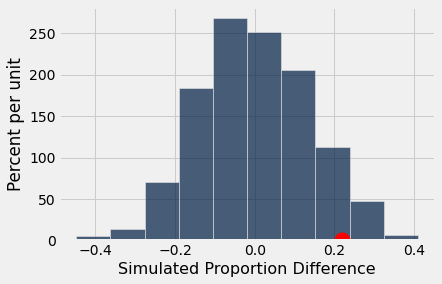

In [104]:
repetitions_ab = 1000
test_stats = make_array()

for i in np.arange(repetitions_ab):
    test_stats = np.append(test_stats, simulate_one_stat())

# here's code to generate a histogram of values and the red dot is the observed value
Table().with_column("Simulated Proportion Difference", test_stats).hist("Simulated Proportion Difference");
plt.plot(observed_diff_proportion, 0, 'ro', markersize=15);

**Question 14.** Compute the empirical p-value for this test, and assign it to `p_value_ab`.

<!--
BEGIN QUESTION
name: q1_14
manual: false
-->

In [107]:
p_value_ab = np.count_nonzero(test_stats >= observed_diff_proportion)/1000
p_value_ab

0.144

In [108]:
ok.grade("q1_14");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



For `p_value_ab`, you should be getting a value around 10-15%. If our p-value cutoff is 5%, the data is more consistent with the null hypothesis - that there is no difference in the distribution of calls Yanay picked up between visited and not visited area codes.

## 2. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. **IMPORTANT: Make sure to check that your submission is not empty. We cannot guarantee that the submission will be valid, so please check it now.** If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

**NOTE:** The tests that are provided are not comprehensive and act as sanity checks (i.e. to make sure you answer is in the correct form, etc.). Passing the tests for a question does not mean that you answered the question correctly.

In [109]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Submit... 100% complete
Assignment is due in 32 minutes and 26 seconds
Submission successful for user: caediseim@berkeley.edu
URL: https://okpy.org/cal/data8/sp21/hw07/submissions/vZ4lqg



In [110]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t